In [1]:
# Importing necessary Libaries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### Applying the object detector on one frame of the Video

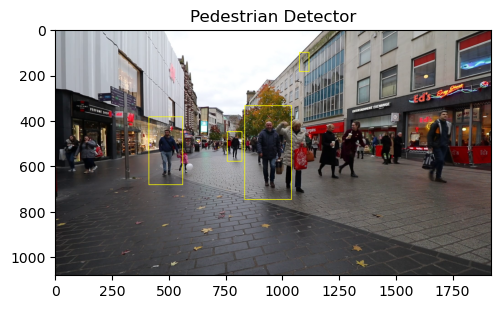

In [2]:
# Creating video capturing object
cap = cv2.VideoCapture('video_walking.mp4')

# Loading the body classifier
body_classifier = cv2.CascadeClassifier("C:/Users\DELL  LATITUDE E5480\Downloads\Modern Computer Vision\Computer Vision Practice\Haarcascades/haarcascade_fullbody.xml")

# Reading the  first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret:

    #Grayscaling the image for faster processing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Passing the frame to the body classifier
    #1.2 -> scaling factor, 3 -> minimum number of neighbors required to be classifed as a valid body
    #detection
    #Returns the coordinates of the bounding boxes drwan around humans
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

# Release the video capture
cap.release()
imshow("Pedestrian Detector", frame)

### Applying the object detector on the entire video

In [24]:
# Creating the video capturing object
cap = cv2.VideoCapture('video_walking.mp4')

# Getting the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
#-> H264 is compression format
#30 -> frame rate
#(w,h) -> dimasions of the video
out = cv2.VideoWriter('walking_output.mp4', cv2.VideoWriter_fourcc('H','2','6','4'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):

    ret, frame = cap.read()
    #ret-> returns true if the frame was successfully read
    #frame -> contains the image matrix data
    if ret:

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Passing frame to the body classifier
        bodies = body_detector.detectMultiScale(gray, 1.2, 3)

        # Extracting bounding boxes for any bodies identified
        for (x,y,w,h) in bodies:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        # Writing the frame into the file 'output.avi'
        out.write(frame)
    else:
        break

cap.release()
out.release()

### Displaying the result

In [29]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [30]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [16]:
#.AVI IS THE PROBLEM
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="walking_output.avi" type="video/avi">
    </video>
""")

### Vehicle detection

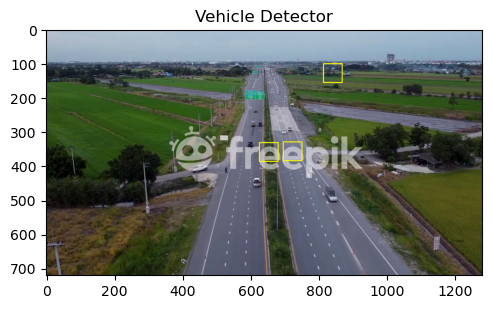

In [31]:
## Vehicle prediction
# Creating the video capturing object
cap = cv2.VideoCapture('driving_cars.mp4')

# Loading the vehicle classifier
vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Reading the first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret:

  #Grayscaling the image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Passing the frame to the body classifier
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  # Extracting bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

# Releasing the video capture
cap.release()
imshow("Vehicle Detector", frame)

In [32]:
# Creating the video capturing object
cap = cv2.VideoCapture('driving_cars.mp4')

# Getting the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Definining the codec and creating VideoWriter object.The output is stored in 'cars_output.avi' file.
out = cv2.VideoWriter('cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

vehicle_detector = cv2.CascadeClassifier('C:/Users\DELL  LATITUDE E5480\Downloads\Modern Computer Vision\Computer Vision Practice\Haarcascades/haarcascade_car.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret:

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Passing the frame to the body classifier
    vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

    # Extracting bounding boxes for any bodies identified
    for (x,y,w,h) in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # Writing the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)